In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
titanic_ds = pd.read_csv(r"D:\NEW PROJECT\Codsoft Project/tested.csv")
titanic_ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
titanic_ds.shape

(418, 12)

In [4]:
titanic_ds.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
titanic_ds.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
titanic_ds = titanic_ds.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [7]:
titanic_ds['Fare'] = titanic_ds['Fare'].fillna(titanic_ds['Fare'].mean())

In [8]:
titanic_ds['Age'] = titanic_ds['Age'].fillna(titanic_ds['Age'].mean())
# , inplace=True

In [9]:
# print(titanic_ds['Fare'].mode()[0])

In [10]:
# titanic_ds['Fare'].fillna(titanic_ds['Fare'].mode()[0], inplace=True)

In [11]:
titanic_ds.isnull().sum()


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [12]:
titanic_ds.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      418 non-null    float64
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.3+ KB


In [13]:
titanic_ds['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [14]:
sex_counts = titanic_ds['Sex'].value_counts()
sex_labels = sex_counts.index
count_values = sex_counts.values

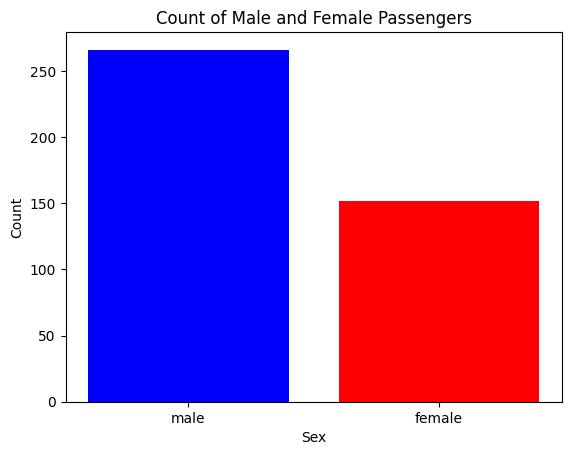

In [15]:
plt.bar(sex_labels, count_values, color=['blue', 'red'])
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Count of Male and Female Passengers")
plt.show()

<Axes: xlabel='Sex'>

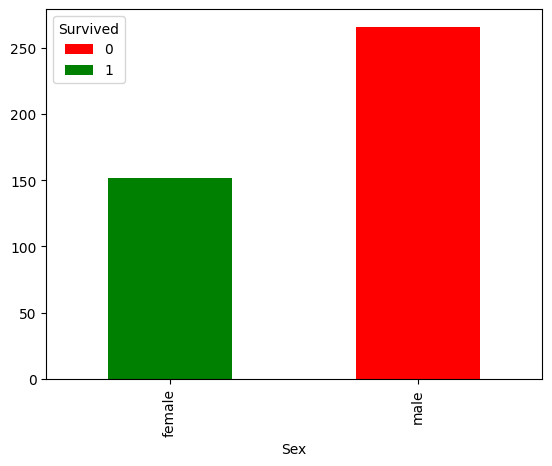

In [16]:
survived_by_gender = titanic_ds.groupby(['Sex', 'Survived']).size().unstack()
survived_by_gender.plot(kind='bar', stacked=True, color=['red', 'green'])


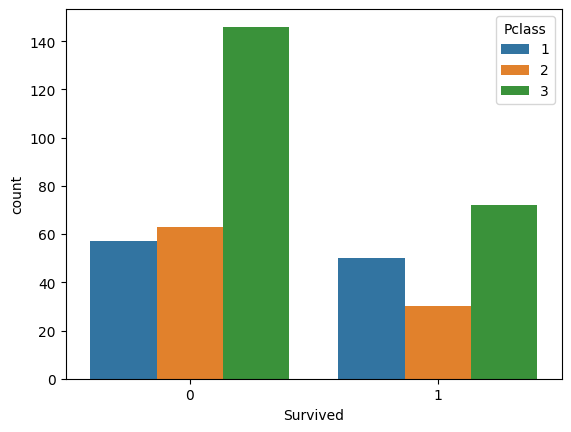

In [17]:
sns.countplot(x=titanic_ds['Survived'], hue=titanic_ds['Pclass'])
plt.show()

In [18]:
titanic_ds['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [19]:
titanic_ds.replace({'Sex': {'male': 0, 'female': 1}, 'Embarked': {'Q': 0, 'S': 1, 'C': 2}}, inplace=True)

In [20]:
titanic_ds.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34.5,0,0,7.8292,0
1,1,3,1,47.0,1,0,7.0000,1
2,0,2,0,62.0,0,0,9.6875,0
3,0,3,0,27.0,0,0,8.6625,1
4,1,3,1,22.0,1,1,12.2875,1


In [21]:
x=titanic_ds.drop(columns = ['Survived'],axis=1)
y=titanic_ds['Survived']

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2 , random_state=2)

In [23]:
print(x.shape,x_train.shape,x_test.shape)

(418, 7) (334, 7) (84, 7)


In [24]:
model=LogisticRegression()

In [25]:
model.fit(x_train,y_train)

C:\Program Files\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
x_train_prediction = model.predict(x_train)

In [27]:
print(x_train_prediction)

[1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0
 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0
 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1
 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0
 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1
 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1
 1]


In [28]:
training_data_accuracy = accuracy_score(y_train,x_train_prediction)
print('Accuracy of training data:" ', training_data_accuracy)

Accuracy of training data:"  1.0


In [29]:
x_test_prediction=model.predict(x_test)
print(x_test_prediction)

[0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0
 0 1 1 0 1 0 0 0 0 0]


In [30]:
print(y_test)

146    0
223    0
193    0
305    1
188    1
      ..
348    0
30     0
174    0
68     0
204    0
Name: Survived, Length: 84, dtype: int64


In [31]:
testing_data_accuracy = accuracy_score(y_test,x_test_prediction)
print('Accuracy of testing data:" ', testing_data_accuracy)

Accuracy of testing data:"  1.0


In [32]:
# x_new = np.array([[5.0, 3.6, 1.4, 0.2],[6.3, 2.5, 5.0, 1.9],[5.5, 2.3, 4.0, 1.3]])
# prediction1 = model.predict(x_new)
# print("Prediction of Species: {}".format(prediction1))

In [33]:
import warnings
warnings.filterwarnings("ignore")
ans = model.predict([[1,3,1,22.0,1,1,12.2875]])

if(ans==0):
    print("Not survived")
else:
    print("Person is survived")

Person is survived
